0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
1914    4.0
1915    NaN
1916    4.0
1917    2.0
1918    4.0
Name: weather, Length: 1919, dtype: float64
                 hour  temp  wind  humidity  weather
461   2024/11/20 6:00   4.0   1.2        93      4.0
581   2024/11/25 6:00   3.9   1.8       100      8.0
941   2024/12/10 6:00   2.3   3.3       100      4.0
989   2024/12/12 6:00   2.1   1.6        91      4.0
1013  2024/12/13 6:00   2.9   3.5        84      4.0
1181  2024/12/20 6:00   0.2   1.1       100      8.0
1205  2024/12/21 6:00   3.5   3.6        78      4.0
1253  2024/12/23 6:00   0.7   2.2        99      4.0
1301  2024/12/25 6:00   1.1   2.4       100      8.0
1397  2024/12/29 6:00   1.9   3.1        92      4.0
1421  2024/12/30 6:00   1.5   1.0        99      4.0
1469    2025/1/1 6:00   3.0   1.7        89      4.0
1517    2025/1/3 6:00   2.7   1.8        97      4.0
1541    2025/1/4 6:00   2.4   2.8        81      4.0
1589    2025/1/6 6:00   3.0  

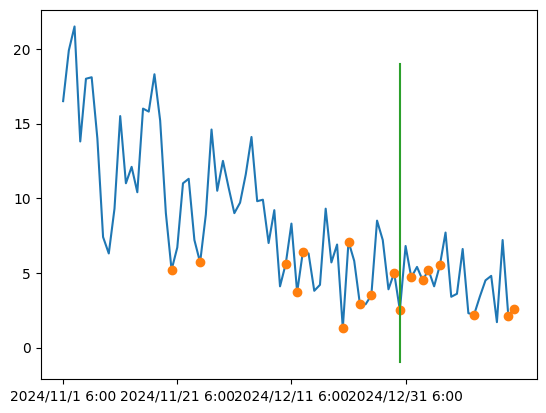

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("2024_data.csv")
#print(df)
endpoint = -1

temp = df["temperature"][:endpoint]
wind = df["windspeed"][:endpoint]
hour = df["hour"][:endpoint]
weather = df["weather"][:endpoint]
humidity = df["humidity"][:endpoint]
####2晴、4曇、10雨、8霧、15雷、11みぞれ、12雪

print(weather)
temp6 = temp[5::24]
hour6 = hour[5::24]
weather6 = weather[5::24]
wind6 = wind[5::24]
humidity6 = humidity[5::24]
C4temp = np.full_like(temp6,4.0)
# C3temp = np.full_like(temp6,3)
# C2temp = np.full_like(temp6,2)
# C1temp = np.full_like(temp6,1)

hoursimo = hour6[temp6<=4.0][weather6!=10][weather6!=11][weather6!=12][weather6!=15]
tempsimo = temp6[temp6<=4.0][weather6!=10][weather6!=11][weather6!=12][weather6!=15]
whethersimo = weather6[temp6<=4.0][weather6!=10][weather6!=11][weather6!=12][weather6!=15]
windsimo = wind6[temp6<=4.0][weather6!=10][weather6!=11][weather6!=12][weather6!=15]
humidsimo = humidity6[temp6<=4.0][weather6!=10][weather6!=11][weather6!=12][weather6!=15]
htw = pd.DataFrame({"hour":hoursimo,"temp":tempsimo,"wind":windsimo,"humidity":humidsimo,"weather":whethersimo})
htw.to_csv("2024_06hour_data.csv")
print(htw)

print(temp6 + wind6)
fig = plt.figure()
ax = fig.add_subplot(111)
# T6 = ax.plot(hour6,temp6)
# H6 = ax.plot(hour6,humidity6)
# W6 = ax.plot(hour6,wind6)
ax.plot(hour6,temp6+wind6)
ax.plot(hoursimo,tempsimo+windsimo, marker='o', linestyle='')
# C4 = ax.plot(hour6,C4temp)
# C3 = ax.plot(hour6,C3temp)
# C2 = ax.plot(hour6,C2temp)
# C1 = ax.plot(hour6,C1temp)
end = ax.plot(np.full_like(np.arange(-1,20,1),59),np.arange(-1,20,1))
plt.xticks(hour6[::20])
plt.show()

